In [1]:
from helper.dataset_reader import read_tsv
from comlid_crf import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn_crfsuite import metrics

In [2]:
langid = LanguageIdentifier()

In [3]:
raw_data = read_tsv('../dataset/all-merged-data-140422.tsv')
data = langid.data_transformer(raw_data)
X = [langid.sent2features(s) for s in data]
y = [langid.sent2tags(s) for s in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [4]:
len(X_train)

3613

In [5]:
len(X_test)

1781

In [6]:
model = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	max_iterations=100,
	all_possible_transitions=True,
	c1=0.04077752338043632,
	c2=0.08790533946499102,
)

In [7]:
# train CRF
%time
model.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.04077752338043632,
    c2=0.08790533946499102, keep_tempfiles=None, max_iterations=100)

In [8]:
y_pred = model.predict(X_test)


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.95      0.97      0.96     22315
          JV       0.91      0.91      0.91      4911
          EN       0.93      0.92      0.92      5006
   MIX-ID-EN       0.95      0.90      0.93       975
   MIX-ID-JV       0.95      0.88      0.91       289
   MIX-JV-EN       0.94      0.86      0.90       274
           O       0.96      0.92      0.94     10167

    accuracy                           0.95     43937
   macro avg       0.94      0.91      0.93     43937
weighted avg       0.95      0.95      0.95     43937



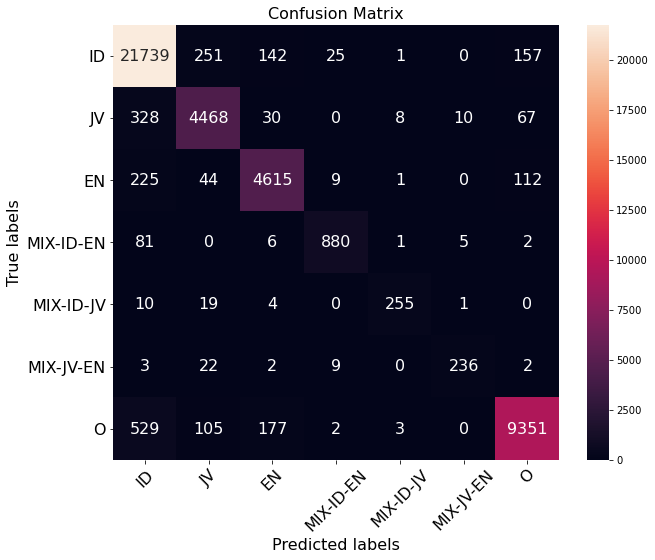

In [9]:
print('\n Evaluation on the test data')
langid.show_confusion_matrix(y_test, y_pred)

# increase font of x and y axis

In [10]:
print("\nTop likely transitions:")
langid.print_transitions(Counter(model.transition_features_).most_common(20))
print("\nTop unlikely transitions:")
langid.print_transitions(Counter(model.transition_features_).most_common()[-20:])

# check the state features
print("\nTop positive:")
langid.print_state_features(Counter(model.state_features_).most_common(20))
print("\nTop negative:")
langid.print_state_features(Counter(model.state_features_).most_common()[-20:])


Top likely transitions:
O          -> O          0.91242
ID         -> O          0.79622
O          -> ID         0.73847
O          -> JV         0.71893
JV         -> O          0.68251
EN         -> O          0.62506
JV         -> JV         0.50788
O          -> EN         0.48553
EN         -> EN         0.42155
ID         -> ID         0.23933
MIX-JV-EN  -> O          0.17526
JV         -> MIX-ID-JV  -0.04045
ID         -> EN         -0.06937
O          -> MIX-ID-JV  -0.08359
MIX-ID-EN  -> O          -0.09342
JV         -> MIX-JV-EN  -0.11008
MIX-JV-EN  -> JV         -0.11062
EN         -> ID         -0.13786
MIX-ID-JV  -> JV         -0.20220
O          -> MIX-ID-EN  -0.24318

Top unlikely transitions:
EN         -> MIX-ID-EN  -0.50239
EN         -> MIX-JV-EN  -0.51104
MIX-JV-EN  -> MIX-JV-EN  -0.54765
MIX-ID-JV  -> ID         -0.58578
MIX-JV-EN  -> EN         -0.60433
ID         -> MIX-ID-JV  -0.61011
MIX-ID-JV  -> MIX-JV-EN  -0.66988
MIX-JV-EN  -> ID         -0.71427
MIX-ID-

In [11]:
import eli5

eli5.show_weights(model,horizontal_layout=False, show=['transition_features'])

From \ To,EN,ID,JV,MIX-ID-EN,MIX-ID-JV,MIX-JV-EN,O
EN,0.422,-0.138,-0.369,-0.502,-1.095,-0.511,0.625
ID,-0.069,0.239,-0.269,-0.261,-0.61,-1.033,0.796
JV,-0.351,-0.271,0.508,-1.533,-0.04,-0.11,0.683
MIX-ID-EN,-0.401,-0.39,-1.189,-0.86,-0.853,-1.627,-0.093
MIX-ID-JV,-0.849,-0.586,-0.202,-3.588,-1.282,-0.67,-0.249
MIX-JV-EN,-0.604,-0.714,-0.111,-1.101,-1.106,-0.548,0.175
O,0.486,0.738,0.719,-0.243,-0.084,-0.368,0.912


In [12]:
eli5.show_weights(model, targets=['ID','EN','JV'])

In [13]:
eli5.show_weights(model, targets=['MIX-ID-EN','MIX-ID-JV','MIX-JV-EN','O'])